# Credit Card Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load Data

Data download from https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023 .
The credit card transactions done by European cardholders in 2023 are included in this dataset. It has more than 550,000 records in total, and to safeguard the identity of the cardholders, the data has been anonymized. This dataset's main goal is to make it easier to create models and algorithms for fraud detection that may be used to spot possibly fraudulent transactions.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AT Project/creditcard_2023.csv')
# Converting all column names to lower case
df.columns = df.columns.str.lower()
df.sample(n = 10)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
444612,444612,-0.135668,0.143539,-0.125757,0.149152,-0.112737,-0.293202,-0.134130,0.052249,-0.368581,...,0.114087,0.065991,-0.077962,-0.004476,0.128249,-0.236378,0.297167,0.501526,19303.20,1
434081,434081,-0.940288,0.576981,-0.784847,0.726264,-0.818733,-0.792234,-0.728505,0.466670,-0.812064,...,0.327106,0.053817,-0.344381,0.302694,0.454806,-0.418135,-0.005106,1.473079,857.54,1
128732,128732,-0.095787,-0.084154,0.868350,-0.156671,0.349952,0.756563,0.553955,-0.018983,0.247897,...,-0.112324,0.060142,-0.158643,-1.257074,0.017015,-0.389956,0.119398,0.200436,9136.47,0
366633,366633,-0.395590,-0.024874,0.211438,-0.171183,-0.145649,-0.004703,-0.109203,-0.016461,-0.009131,...,0.164014,0.638978,-0.171162,-0.004704,0.368778,-0.897788,-0.580749,-0.369836,16027.90,1
445479,445479,0.687725,-0.276342,0.732660,0.068296,0.352411,0.626679,0.445431,-0.111812,0.197903,...,-0.182238,-0.417094,0.053227,0.387801,0.075094,0.011084,-0.188125,-0.074410,20506.68,1
492411,492411,-1.850524,1.495123,-1.914219,2.242035,-1.358952,-0.881976,-1.942857,-0.283099,-2.135017,...,-1.169405,0.716528,-0.154954,-1.619172,1.272098,1.610659,3.246000,-3.061320,15410.75,1
160152,160152,1.831652,-0.519512,-0.038740,-0.549715,0.276608,-0.056017,0.429587,-0.183764,1.303539,...,-0.014542,0.601193,-0.001515,1.132825,0.395725,-1.062779,-0.252800,-0.231117,12744.70,0
509713,509713,-1.061050,0.721177,-1.152321,1.311062,-0.746202,-1.068439,-0.960112,0.784263,-1.297715,...,0.332041,-0.224077,0.128016,-0.746153,0.120265,1.569655,0.520760,-1.404379,2228.37,1
183112,183112,-0.262897,-0.905259,0.229759,-0.453147,0.829374,-0.684549,0.829007,-0.274951,0.241411,...,-0.038528,0.691234,0.815897,0.206791,-0.280736,2.328956,-0.149595,0.408187,21101.74,0
168022,168022,1.667807,-0.846371,-0.368812,-0.999391,0.563910,0.220738,0.663676,-0.239833,-0.140738,...,-0.113227,-0.011794,-0.376290,-0.495235,0.812466,2.010501,-0.429119,-0.281758,4316.39,0



*   id: Unique identifier for each transaction
*   V1-V28: Anonymized features representing various transaction attributes
 (e.g., time, location, etc.)
*   Amount: The transaction amount
*   Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)


##Exploratory Data Analysis

EDA involves exploring and summarizing key characteristics of the dataset. This may include summary statistics, data distributions, correlation analysis, and visualization of key features.

In [ ]:
df.shape

(568630, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   v1      568630 non-null  float64
 2   v2      568630 non-null  float64
 3   v3      568630 non-null  float64
 4   v4      568630 non-null  float64
 5   v5      568630 non-null  float64
 6   v6      568630 non-null  float64
 7   v7      568630 non-null  float64
 8   v8      568630 non-null  float64
 9   v9      568630 non-null  float64
 10  v10     568630 non-null  float64
 11  v11     568630 non-null  float64
 12  v12     568630 non-null  float64
 13  v13     568630 non-null  float64
 14  v14     568630 non-null  float64
 15  v15     568630 non-null  float64
 16  v16     568630 non-null  float64
 17  v17     568630 non-null  float64
 18  v18     568630 non-null  float64
 19  v19     568630 non-null  float64
 20  v20     568630 non-null  float64
 21  v21     56

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['class'].value_counts()/len(df)

class
0    0.5
1    0.5
Name: count, dtype: float64

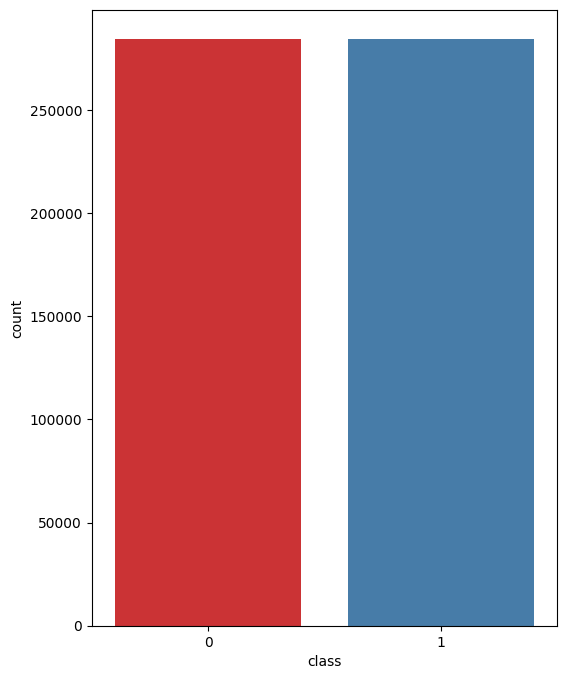

In [ ]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='class', data=df, palette='Set1')
plt.show()

In [ ]:
df[['id','amount']].describe()

,id,amount
count,568630.000000,568630.000000
mean,284314.500000,12041.957635
std,164149.486122,6919.644449
min,0.000000,50.010000
25%,142157.250000,6054.892500
50%,284314.500000,12030.150000
75%,426471.750000,18036.330000
max,568629.000000,24039.930000


In [ ]:
fraud = df[df['class']==1]
normal = df[df['class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Normal Transactions: {normal.shape}')

Shape of Fraud Transactions: (284315, 31)
Shape of Normal Transactions: (284315, 31)


In [ ]:
pd.concat([fraud['amount'].describe(), normal['amount'].describe()], axis=1)

,amount,amount
count,284315.000000,284315.000000
mean,12057.601763,12026.313506
std,6909.750891,6929.500715
min,50.010000,50.120000
25%,6074.640000,6034.540000
50%,12062.450000,11996.900000
75%,18033.780000,18040.265000
max,24039.930000,24039.930000


In [ ]:
fraud['amount'].value_counts().head()

amount
70.64       4
15521.04    4
15697.11    4
19073.22    4
860.03      4
Name: count, dtype: int64

###Distribution of Transaction id

Analyzing the distribution of the 'id' feature in the dataset. This could involve plotting histograms or density plots to understand the distribution of transaction times.

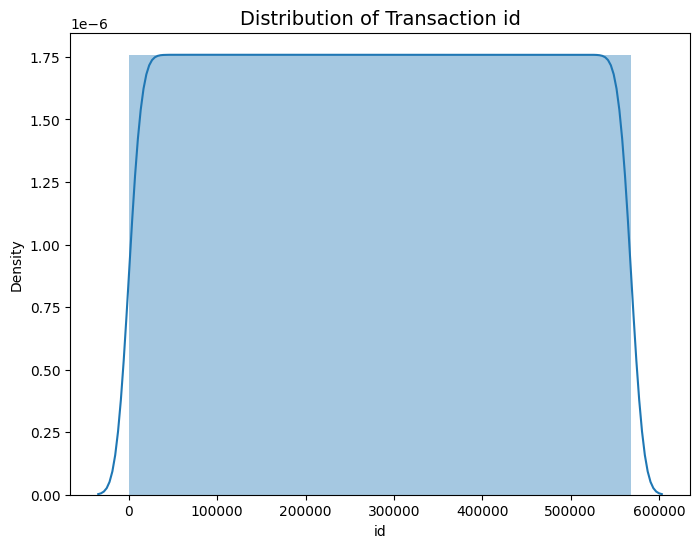

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction id', fontsize=14)
sns.distplot(df['id'], bins=100)
plt.show()

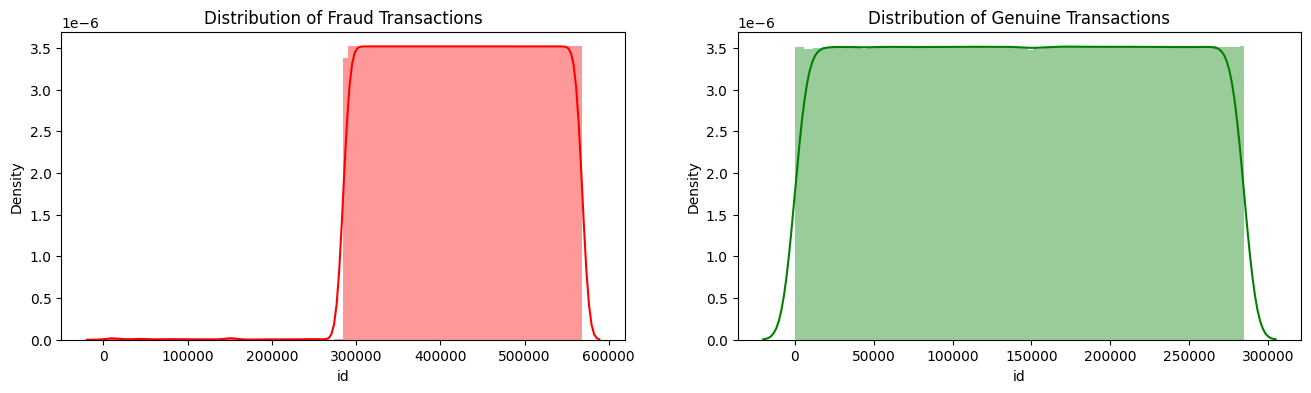

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(fraud['id'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['id'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

###Distribution of Amount

Analyzing the distribution of the 'Amount' feature in the dataset. Similar to the analysis of 'id', this step may involve visualizing the distribution of transaction amounts.

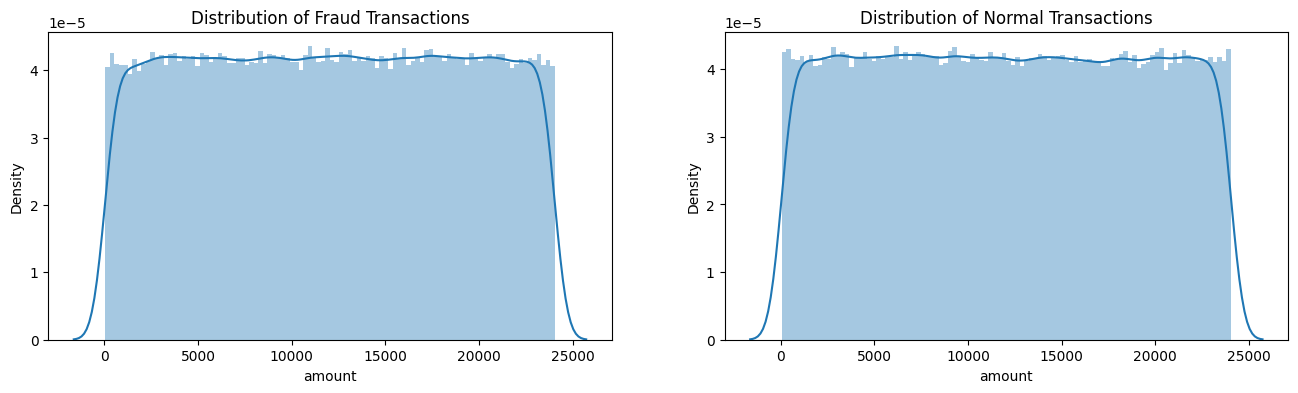

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(fraud['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

In [ ]:
# Scale amount by log
df['amount_log'] = np.log(df.amount + 0.0001)

Log transforms are useful when applied to skewed distributions because they tend to expand values in the lower magnitude range and tend to compress or reduce values in the magnitude range. higher

In [ ]:
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,amount_log
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,9.797132
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0,8.784372
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0,7.829447
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0,8.591269
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0,9.566543


##Spliting the data

Splitting the dataset into training and testing sets. This is typically done to evaluate the performance of machine learning models on unseen data. Common splits include 80/20 for training and testing, respectively.

In [ ]:
X = df.drop(['class','id'], axis=1)

y = df['class']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((454904, 30), (113726, 30))

##Scaling the data

Scaling the data to ensure that all features have the same scale. This is important for certain machine learning algorithms, such as support vector machines and k-nearest neighbors, which are sensitive to feature scales.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

##SMOTE

Using the SMOTE technique to address class imbalance in the dataset. SMOTE generates synthetic samples for the minority class to balance the class distribution, thereby improving the performance of machine learning models.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 227591, 1: 227313})
Resampled dataset shape Counter({0: 227591, 1: 227591})


##Modeling



In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    #print("Precision  = {}".format(precision))
    #print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    #plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)

    return model, accuracy, roc_auc, f1, time_taken

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.layers import Flatten
from sklearn.naive_bayes import GaussianNB

# Assuming X_train_smt, y_train_smt, X_test, and y_test are already defined

#Apply SMOTE for balancing the dataset
smote = SMOTE()
X_train_smt_balanced, y_train_smt_balanced = smote.fit_resample(X_train_smt, y_train_smt)

# Train LSTM Model
# Assuming you have sequential data, reshape your input features accordingly
# For example, if each sample has a sequence length of seq_length
seq_length = X_train.shape[1]  # Adjust this according to your data
X_train_lstm = X_train.reshape((X_train.shape[0], seq_length, 1))

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(seq_length, 1)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

#Train GRU Model
# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(units=50, input_shape=(seq_length, 1)))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the GRU model
model_gru.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

#Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_smt_balanced, y_train_smt_balanced)

#Train Artificial Neural Network Model
model_ann = Sequential()
model_ann.add(Flatten(input_shape=(seq_length, 1)))  # Flatten the input
model_ann.add(Dense(128, activation='relu'))  # Add a dense layer with ReLU activation
model_ann.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the ANN model
model_ann.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

#Obtain Predictions
# For LSTM
X_test_lstm = X_test.reshape((X_test.shape[0], seq_length, 1))
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)  # Convert probabilities to binary predictions

# For GRU
y_pred_gru = model_gru.predict(X_test_lstm)
y_pred_gru = (y_pred_gru > 0.5).astype(int)  # Convert probabilities to binary predictions

# For Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# For ANN
y_pred_ann = model_ann.predict(X_test_lstm)
y_pred_ann = (y_pred_ann > 0.5).astype(int)  # Convert probabilities to binary predictions


# 5. Evaluate Predictions
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm)
f1_score_lstm = f1_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)

accuracy_gru = accuracy_score(y_test, y_pred_gru)
roc_auc_gru = roc_auc_score(y_test, y_pred_gru)
f1_score_gru = f1_score(y_test, y_pred_gru)
precision_gru = precision_score(y_test, y_pred_gru)
recall_gru = recall_score(y_test, y_pred_gru)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
f1_score_ann = f1_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)

# Print or use these evaluation metrics as needed
print("LSTM Accuracy:", accuracy_lstm)
print("LSTM ROC AUC:", roc_auc_lstm)
print("LSTM F1 Score:", f1_score_lstm)
print("LSTM Precision:", precision_lstm)
print("LSTM Recall:", recall_lstm)
print("----------------------------------")
print("GRU Accuracy:", accuracy_gru)
print("GRU ROC AUC:", roc_auc_gru)
print("GRU F1 Score:", f1_score_gru)
print("GRU Precision:", precision_gru)
print("GRU Recall:", recall_gru)
print("----------------------------------")
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes ROC AUC:", roc_auc_nb)
print("Naive Bayes F1 Score:", f1_score_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("----------------------------------")
print("Artificial Neural Network Accuracy:", accuracy_ann)
print("Artificial Neural Network ROC AUC:", roc_auc_ann)
print("Artificial Neural Network F1 Score:", f1_score_ann)
print("Artificial Neural Network Precision:", precision_ann)
print("Artificial Neural Network Recall:", recall_ann)

Epoch 1/10
14216/14216 [==============================] - 195s 14ms/step - loss: 0.1183 - accuracy: 0.9567
Epoch 2/10
14216/14216 [==============================] - 196s 14ms/step - loss: 0.0325 - accuracy: 0.9884
Epoch 3/10
14216/14216 [==============================] - 192s 14ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 4/10
14216/14216 [==============================] - 193s 14ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 5/10
14216/14216 [==============================] - 193s 14ms/step - loss: 0.0098 - accuracy: 0.9971
Epoch 6/10
14216/14216 [==============================] - 194s 14ms/step - loss: 0.0079 - accuracy: 0.9977
Epoch 7/10
14216/14216 [==============================] - 198s 14ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 8/10
14216/14216 [==============================] - 198s 14ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 9/10
14216/14216 [==============================] - 194s 14ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 10/10
14216/14216 [============

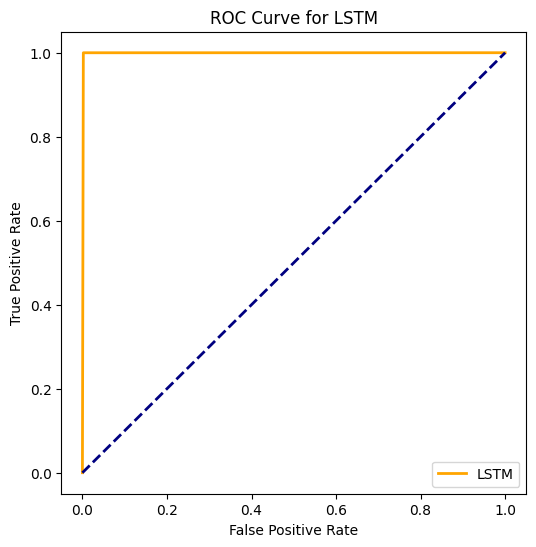

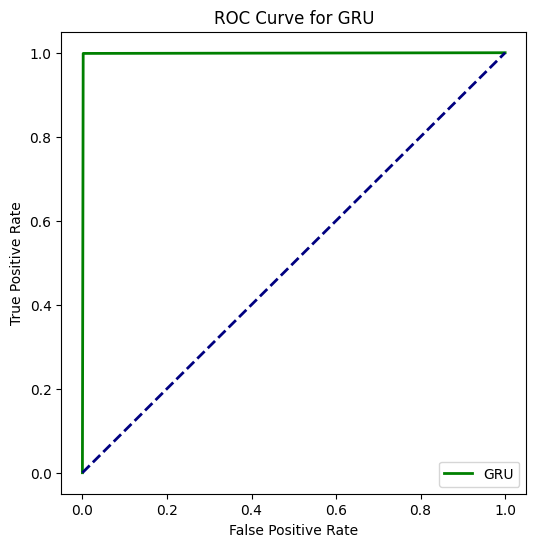

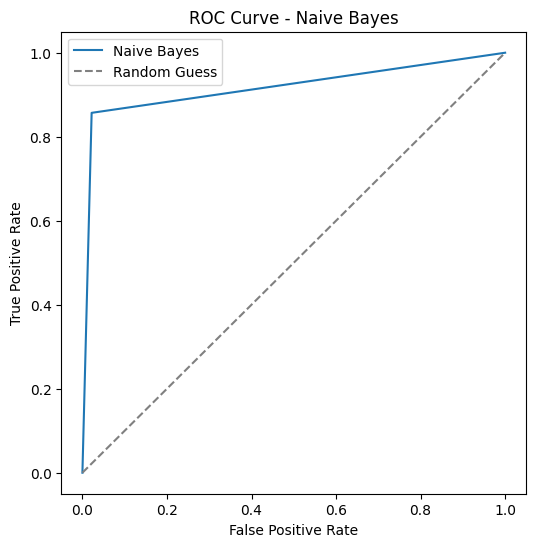

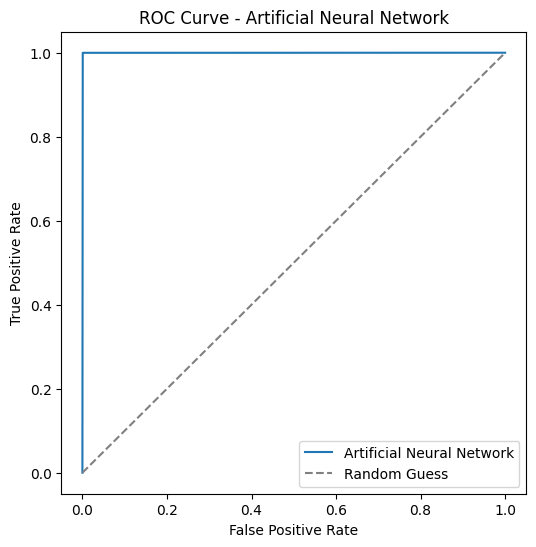

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC curve for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)

plt.figure(figsize=(6, 6))
plt.plot(fpr_lstm, tpr_lstm, color='orange', lw=2, label='LSTM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve for GRU
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru)

plt.figure(figsize=(6, 6))
plt.plot(fpr_gru, tpr_gru, color='green', lw=2, label='GRU')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GRU')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)

plt.figure(figsize=(6, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

# Plot ROC curve for ANN
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)

plt.figure(figsize=(6, 6))
plt.plot(fpr_ann, tpr_ann, label='Artificial Neural Network')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Artificial Neural Network')
plt.legend()
plt.show()


##ROC Curve Comparison

The ROC curve is a graphical representation of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It helps in understanding the trade-off between sensitivity and specificity of a classifier across different thresholds.

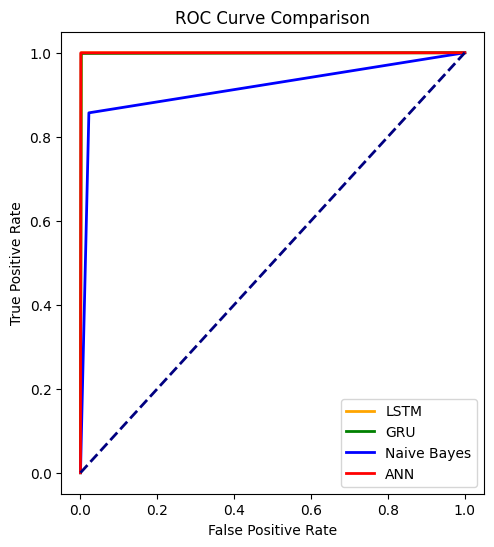

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC curve for both LSTM,GRU,Naive Bayes and ANN
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(fpr_lstm, tpr_lstm, color='orange', lw=2, label='LSTM')
plt.plot(fpr_gru, tpr_gru, color='green', lw=2, label='GRU')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes')
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, label='ANN')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

plt.show()

##Evaluation Metric Comparison among Different Models

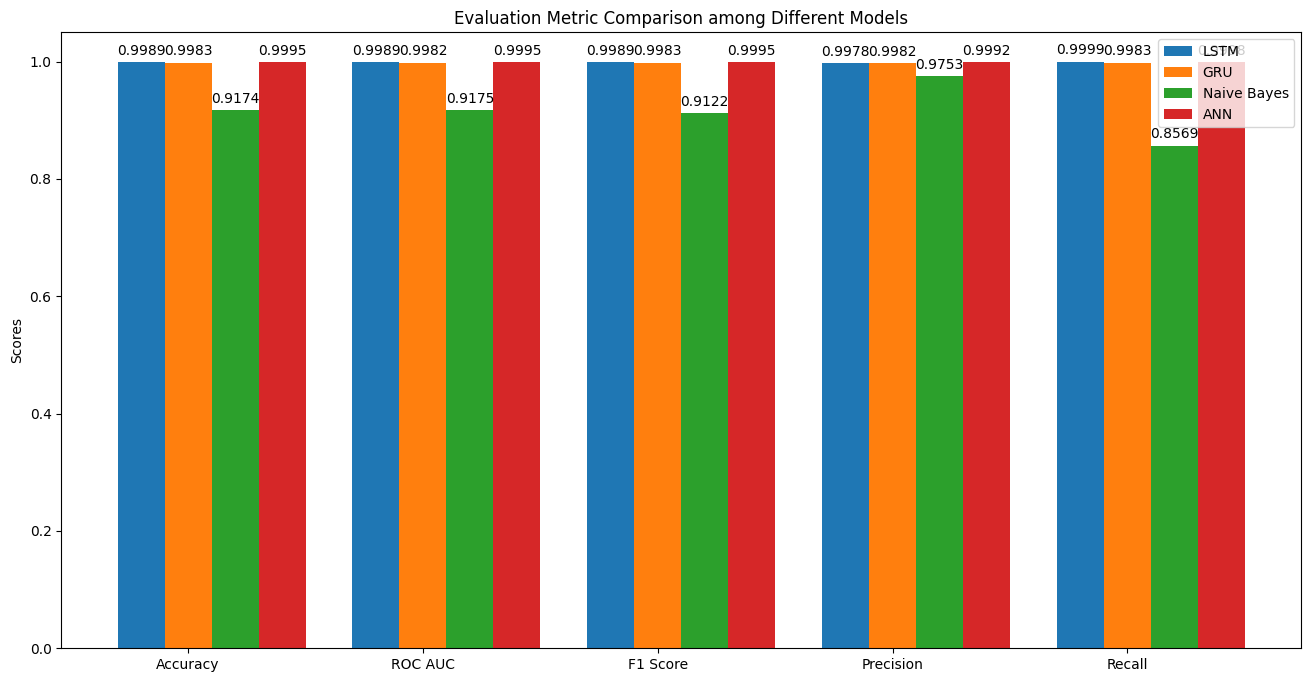

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Define evaluation metrics for LSTM
metrics_lstm = {
    'Accuracy': accuracy_score(y_test, y_pred_lstm),
    'ROC AUC': roc_auc_score(y_test, y_pred_lstm),
    'F1 Score': f1_score(y_test, y_pred_lstm),
    'Precision': precision_score(y_test, y_pred_lstm),
    'Recall': recall_score(y_test, y_pred_lstm)
}

# Define evaluation metrics for GRU
metrics_gru = {
    'Accuracy': accuracy_score(y_test, y_pred_gru),
    'ROC AUC': roc_auc_score(y_test, y_pred_gru),
    'F1 Score': f1_score(y_test, y_pred_gru),
    'Precision': precision_score(y_test, y_pred_gru),
    'Recall': recall_score(y_test, y_pred_gru)
}

# Define evaluation metrics for Naive Bayes
metrics_nb = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'ROC AUC': roc_auc_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb)
}

# Define evaluation metrics for ANN
metrics_ann = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'ROC AUC': roc_auc_score(y_test, y_pred_ann),
    'F1 Score': f1_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann)
}

# Plot the comparison
labels = list(metrics_lstm.keys())
metrics_lstm_values = list(metrics_lstm.values())
metrics_gru_values = list(metrics_gru.values())
metrics_nb_values = list(metrics_nb.values())
metrics_ann_values = list(metrics_ann.values())

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, metrics_lstm_values, width, label='LSTM')
rects2 = ax.bar(x, metrics_gru_values, width, label='GRU')
rects3 = ax.bar(x + width, metrics_nb_values, width, label='Naive Bayes')
rects4 = ax.bar(x + 2*width, metrics_ann_values, width, label='ANN')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metric Comparison among Different Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

In [ ]:
# Define evaluation metrics for LSTM
metrics_lstm = {
    'Accuracy': accuracy_score(y_test, y_pred_lstm),
    'ROC AUC': roc_auc_score(y_test, y_pred_lstm),
    'F1 Score': f1_score(y_test, y_pred_lstm),
    'Precision': precision_score(y_test, y_pred_lstm),
    'Recall': recall_score(y_test, y_pred_lstm)
}

# Define evaluation metrics for GRU
metrics_gru = {
    'Accuracy': accuracy_score(y_test, y_pred_gru),
    'ROC AUC': roc_auc_score(y_test, y_pred_gru),
    'F1 Score': f1_score(y_test, y_pred_gru),
    'Precision': precision_score(y_test, y_pred_gru),
    'Recall': recall_score(y_test, y_pred_gru)
}

# Define evaluation metrics for Naive Bayes
metrics_nb = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'ROC AUC': roc_auc_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb)
}

# Define evaluation metrics for ANN
metrics_ann = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'ROC AUC': roc_auc_score(y_test, y_pred_ann),
    'F1 Score': f1_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann)
}

# Print the evaluation metrics for each model
print("LSTM Evaluation Metrics:")
for metric, value in metrics_lstm.items():
    print(f"{metric}: {value}")
print()

print("GRU Evaluation Metrics:")
for metric, value in metrics_gru.items():
    print(f"{metric}: {value}")
print()

print("Naive Bayes Evaluation Metrics:")
for metric, value in metrics_nb.items():
    print(f"{metric}: {value}")
print()

print("Artificial Neural Network Evaluation Metrics:")
for metric, value in metrics_ann.items():
    print(f"{metric}: {value}")


LSTM Evaluation Metrics:
Accuracy: 0.9988744878040202
ROC AUC: 0.9988719447245372
F1 Score: 0.9988783932983999
Precision: 0.9978466386554622
Recall: 0.9999122837795165

GRU Evaluation Metrics:
Accuracy: 0.9982501802578126
ROC AUC: 0.9982499763510736
F1 Score: 0.9982545850034646
Precision: 0.9981757906368947
Recall: 0.9983333918108137

Naive Bayes Evaluation Metrics:
Accuracy: 0.9173715772998259
ROC AUC: 0.9175198471665135
F1 Score: 0.912245641231568
Precision: 0.9752800463249536
Recall: 0.8568646714150381

Artificial Neural Network Evaluation Metrics:
Accuracy: 0.9994987953502278
ROC AUC: 0.9994980830359488
F1 Score: 0.9995001622280488
Precision: 0.9992110107828527
Recall: 0.9997894810708396


##Interpretation

In this project, the proposed classification model has been tested against a referred LSTM model, as well as ANN, GRU, and Naive Bayes. After evaluating these models on the updated credit card dataset from 2023, containing over 550,000 records, it was found that the ANN model achieved the highest accuracy of 0.9994987953502278. Therefore, it can be concluded that the ANN model outperforms others for the credit card dataset of 2023.
